#### 추세변동

In [1]:
import numpy as np
import pandas as pd

In [47]:
# Datetimeindex

dates = pd.date_range('2020-01-01',periods=48, freq='M')

# additive model : trend + cycle + seasonality + irregular factor
timestamp=(np.arange(len(dates)))
trend_factor = timestamp*1.1
cycle_factor = 10*np.sin(np.linspace(0,3.14*2,48))
seasonal_factor = 7*np.sin(np.linspace(0,3.14*8,48))
np.random.seed(2004)
irregular_factor = 2*np.random.randn(len(dates))

df=pd.DataFrame({'timeseries':trend_factor + cycle_factor + seasonal_factor + irregular_factor, 'trend':trend_factor,'cycle':cycle_factor,
'seasonal':seasonal_factor, 'irregular':irregular_factor}, index=dates)

In [48]:
timestamp

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [49]:
dates # 매달 말일 출력

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='M')

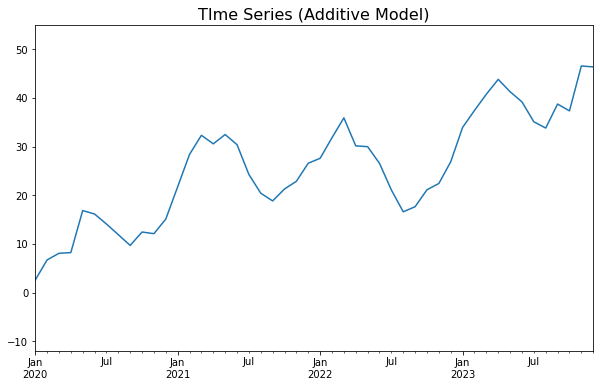

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize = [10,6])
df.timeseries.plot()
plt.title('TIme Series (Additive Model)',fontsize=16)
plt.ylim(-12,55)
plt.show()

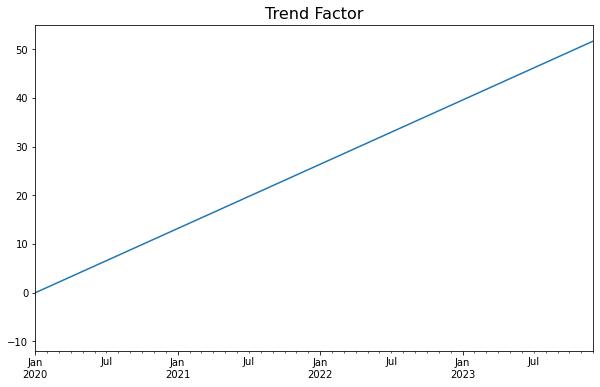

In [51]:
#-- Trend variation
#timestamp = np.arange(len(dates))
# trend_factor = timestamp*1.1

plt.figure(figsize=[10,6])
df.trend.plot()
plt.title('Trend Factor',fontsize=16)
plt.ylim(-12,55)
plt.show()

In [52]:
df.head(5)

,timeseries,trend,cycle,seasonal,irregular
2020-01-31,2.596119,0.0,0.000000,0.000000,2.596119
2020-02-29,6.746160,1.1,1.332198,3.565684,0.748278
2020-03-31,8.112100,2.2,2.640647,6.136825,-2.865371
2020-04-30,8.255941,3.3,3.902021,6.996279,-5.942358
2020-05-31,16.889655,4.4,5.093834,5.904327,1.491495


#### 순환변동

<AxesSubplot:>

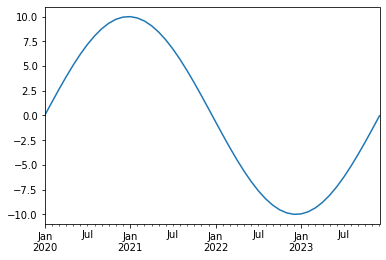

In [13]:
# 4년 주기
# -- Cycle variation
# cycle_factor = 10*np.sin(np.linspace(0,3.14*2, 48))

df.cycle.plot()

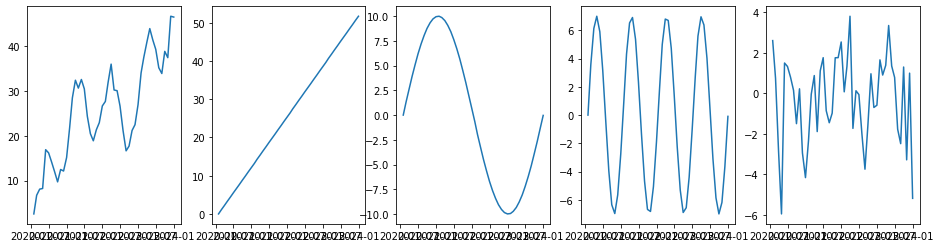

In [53]:
import seaborn as sns
fig, axs = plt.subplots(figsize = (16,4), ncols=5, nrows=1)
features = ['timeseries','trend','cycle','seasonal','irregular']
for i , feature in enumerate(features):
    col = i%5
    axs[col].plot(df[feature])

(-12.0, 55.0)

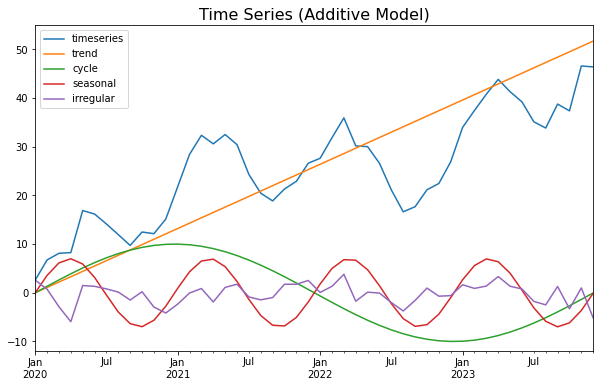

In [55]:
plt.figure(figsize=[10,6])
df.timeseries.plot()
plt.title("Time Series (Additive Model)", fontsize=16)
df.trend.plot()
df.cycle.plot()
df.seasonal.plot()
df.irregular.plot()
plt.legend()
plt.ylim(-12, 55)

#### 단순 이동 이동평균법 rolling 이용 SMA(Simple Moving Average) + expanding CMA 누적 이동평균

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#2020년 8월부터 일요일 8개 조회
# start 시작일 periods 생성할 날짜 개수 freq 생성할 날짜 주기
pd.date_range(start='2020-08',periods=8,freq='W')

DatetimeIndex(['2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23',
               '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20'],
              dtype='datetime64[ns]', freq='W-SUN')

In [56]:
df = pd.DataFrame({'week':pd.date_range(start='2020-08',periods=8,freq='W'), 'sales':[39,44,40,45,38,43,39,np.nan],'3MA':[0]*8})

#0~2주차 평균을 3주차에 shift해서 적용
df["3MA"] = df[["sales"]].rolling(3).mean().shift(1)
df

,week,sales,3MA
0,2020-08-02,39.0,NaN
1,2020-08-09,44.0,NaN
2,2020-08-16,40.0,NaN
3,2020-08-23,45.0,41.0
4,2020-08-30,38.0,43.0
5,2020-09-06,43.0,41.0
6,2020-09-13,39.0,42.0
7,2020-09-20,NaN,40.0


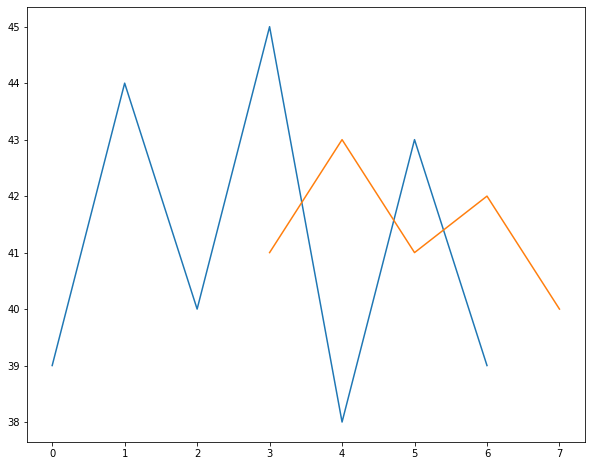

In [65]:
plt.figure(figsize=(10,8))
df.sales.plot()
df["3MA"].plot()
plt.show()

Text(0.5, 1.0, 'Close Price for apple')

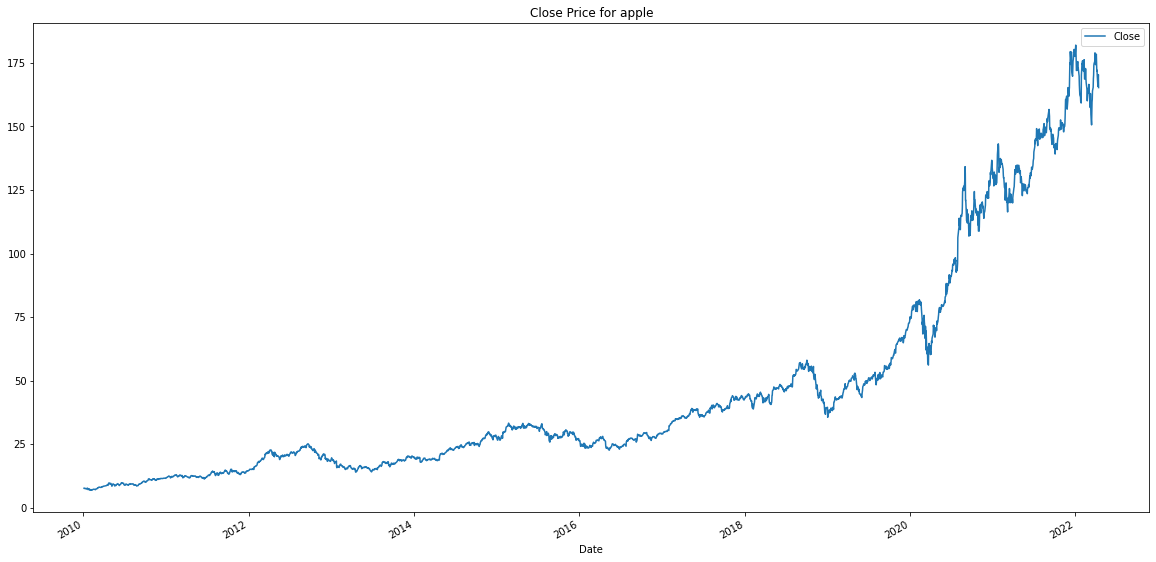

In [97]:
import FinanceDataReader as fdr
#2010~ 현재까지 애플 주가 데이터 프레임
df_apple = fdr.DataReader("AAPL",start='2010')

# 가장 마지막(최신)의 10일치 주가 출력
df_apple.tail(10)

df_apple[['Close']].plot(figsize=(20,10))
df_apple['Close_7Days_Mean']=df_apple['Close'].rolling(7).mean()
plt.title('Close Price for apple')

<AxesSubplot:xlabel='Date'>

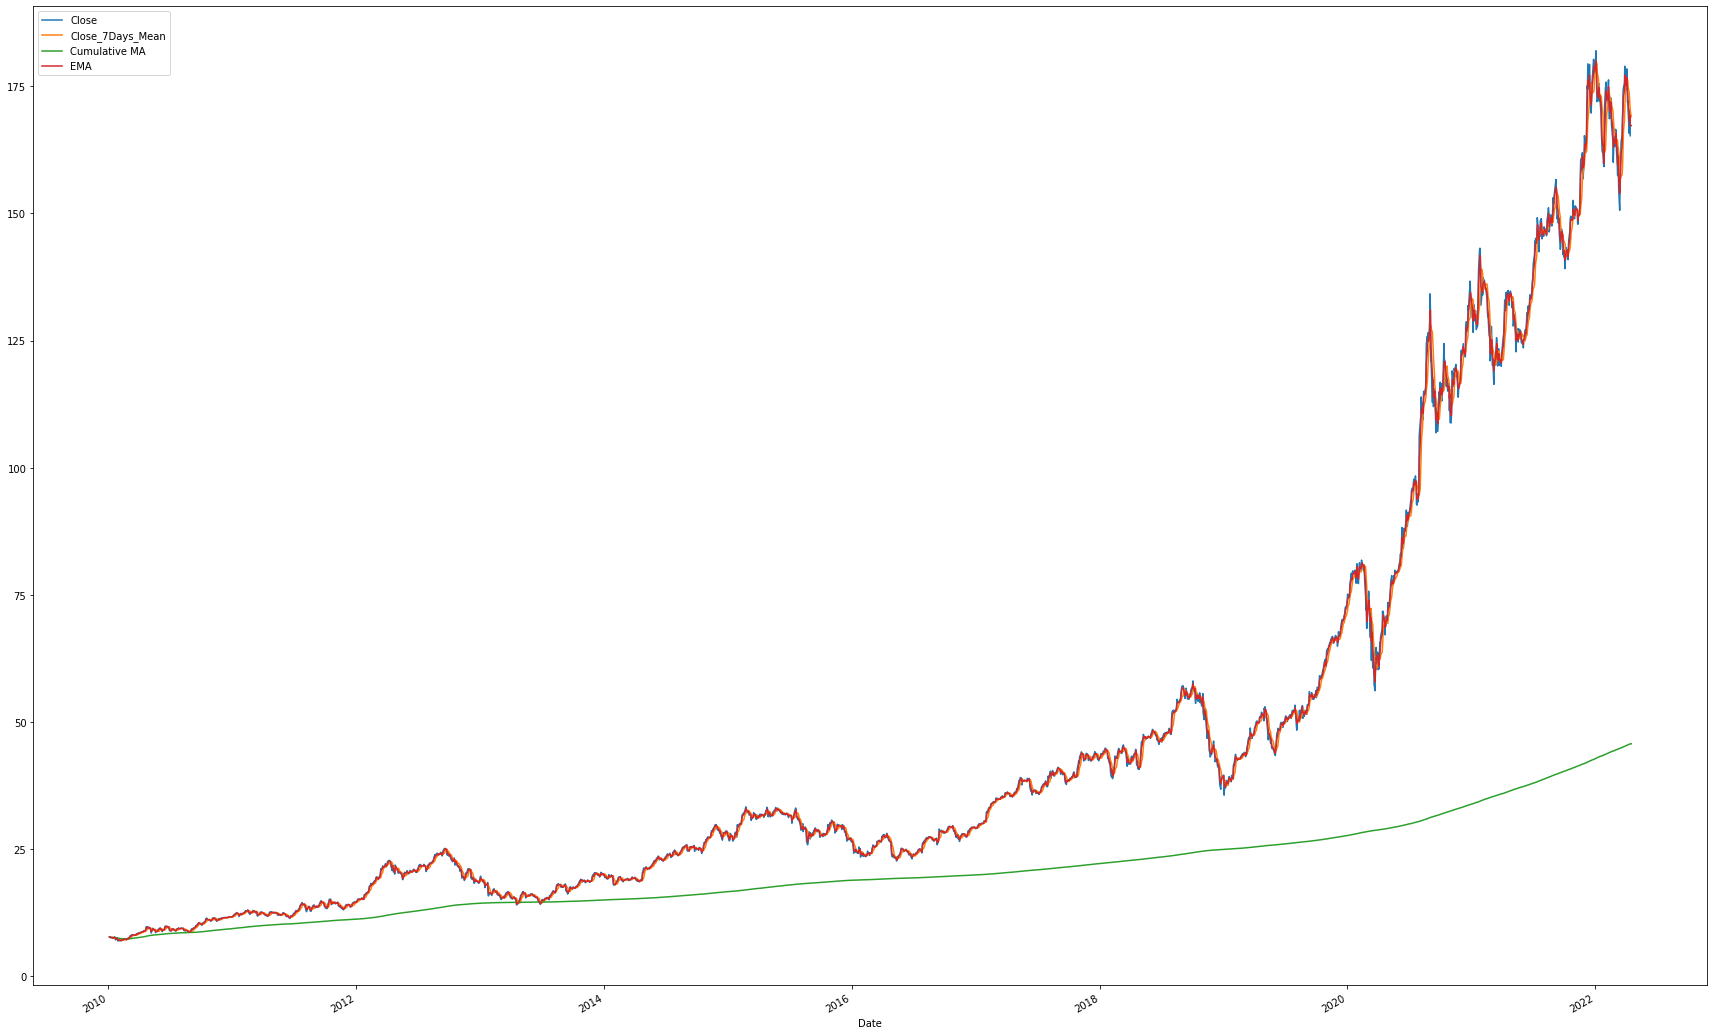

In [138]:
last_day = datetime(2022,4,17)
df_apple.loc[last_day,"Close"] = np.nan
df_apple['Close_7Days_Mean']=df_apple['Close'].rolling(7).mean().shift(1)
df_apple['Cumulative MA']=df_apple['Close'].expanding(3).mean()
df_apple['EMA']=df_apple['Close'].ewm(span=3).mean()
df_apple[['Close','Close_7Days_Mean','Cumulative MA','EMA']].plot(figsize=(30,20))

In [78]:
df_apple

,Close,Open,High,Low,Volume,Change,Close_7Days_Mean
Date,,,,,,,
2010-01-04,7.64,7.62,7.66,7.58,493730000.0,0.0146,NaN
2010-01-05,7.66,7.66,7.70,7.62,601900000.0,0.0026,NaN
2010-01-06,7.53,7.66,7.69,7.53,552160000.0,-0.0170,NaN
2010-01-07,7.52,7.56,7.57,7.47,477130000.0,-0.0013,NaN
2010-01-08,7.57,7.51,7.57,7.47,447880000.0,0.0066,NaN
...,...,...,...,...,...,...,...
2022-04-11,165.75,168.71,169.03,165.50,71550000.0,-0.0255,173.782857
2022-04-12,167.66,168.02,169.87,166.64,78990000.0,0.0115,172.517143
2022-04-13,170.40,167.39,171.04,166.77,70190000.0,0.0163,171.567143


pandas dataframe : resample , 데이터프레임의 시계열 인덱스 기준으로 샘플링을 편하게 해주는 메소드 찾아봐!
월단위로 시계열 데이터를 다시 만들어줌

Text(0.5, 1.0, 'Monthly Mean Close Price for Apple')

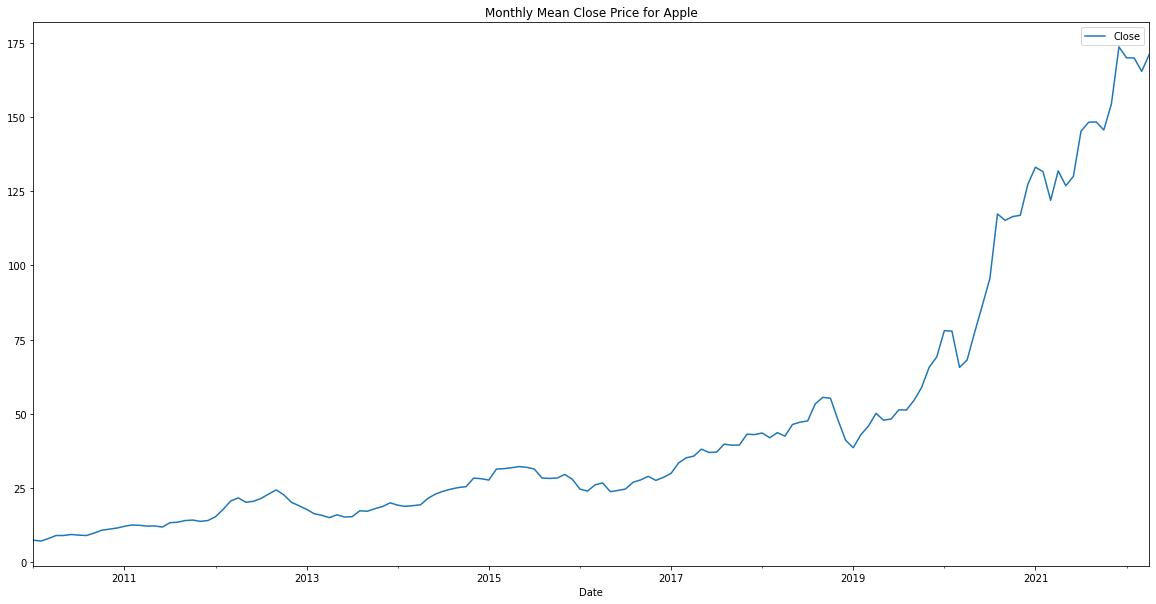

In [81]:
# 월 단위로 주식 가격 평균 샘플링
df_apple_monthly = df_apple.resample(rule='M').mean()
 
#마지막 컬럼(Close_7Days_Mean) 제외
df_apple_monthly = df_apple_monthly.iloc[:,:-1]

#월별 주가(종가)를 시각화
df_apple_monthly[['Close']].plot(figsize=(20,10))
plt.title('Monthly Mean Close Price for Apple')

In [90]:
df_apple_monthly

,Close,Open,High,Low,Volume,Change,Close_3Month_Mean
Date,,,,,,,
2010-01-31,7.416842,7.477895,7.544211,7.331579,7.986816e+08,-0.004632,NaN
2010-02-28,7.100000,7.075263,7.157895,7.011579,5.672258e+08,0.003458,NaN
2010-03-31,7.978261,7.957391,8.023478,7.903043,5.285148e+08,0.006078,NaN
2010-04-30,8.969048,8.964762,9.040476,8.860952,5.889176e+08,0.005195,7.498368
2010-05-31,8.979500,8.999000,9.128000,8.744500,9.045850e+08,-0.000415,8.015769
...,...,...,...,...,...,...,...
2021-12-31,173.552727,173.155000,175.632273,171.252727,1.092945e+08,0.003418,149.375238
2022-01-31,169.861500,170.201000,172.448000,167.639000,1.028565e+08,-0.000565,157.790750
2022-02-28,169.830000,169.634737,171.585263,167.580526,8.396368e+07,-0.002879,165.889981


In [100]:
df_apple_monthly[['Cumulative MA_M']] = df_apple_monthly[["Close"]].expanding(3).mean().shift(1)
# df_apple['EMA']=df_apple['Close'].ewm(span=3).mean()
# df_apple_monthly[['EMA']] = df_apple_monthly[["Close"]].ewm(span=3).mean().shift(1)


In [111]:
# df_apple_monthly[["Close_3Month_sum","Close_3Month_ex_mean"]]
# df_apple_monthly.drop([6:8],axis=1)
# df_apple_monthly.drop(df_apple_monthly.columns[[6,7,8]], axis=1, inplace=True)
df_apple_monthly

,Close,Open,High,Low,Volume,Change,Cumulative MA_M
Date,,,,,,,
2010-01-31,7.416842,7.477895,7.544211,7.331579,7.986816e+08,-0.004632,NaN
2010-02-28,7.100000,7.075263,7.157895,7.011579,5.672258e+08,0.003458,NaN
2010-03-31,7.978261,7.957391,8.023478,7.903043,5.285148e+08,0.006078,NaN
2010-04-30,8.969048,8.964762,9.040476,8.860952,5.889176e+08,0.005195,7.498368
2010-05-31,8.979500,8.999000,9.128000,8.744500,9.045850e+08,-0.000415,7.866038
...,...,...,...,...,...,...,...
2021-12-31,173.552727,173.155000,175.632273,171.252727,1.092945e+08,0.003418,41.714916
2022-01-31,169.861500,170.201000,172.448000,167.639000,1.028565e+08,-0.000565,42.630456
2022-02-28,169.830000,169.634737,171.585263,167.580526,8.396368e+07,-0.002879,43.507912


<AxesSubplot:xlabel='Date'>

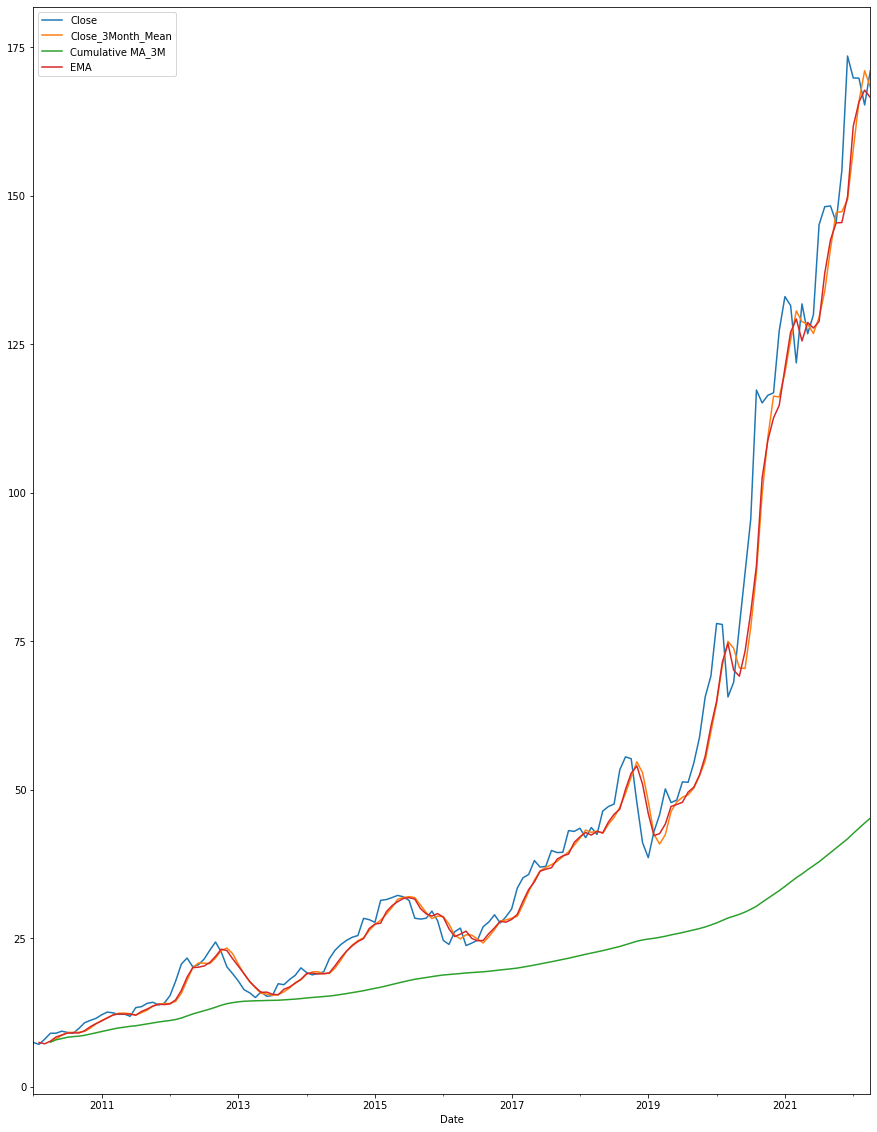

In [139]:
# 월단위 평균값을 또 3개월치씩 이동평균을 적용하는 코드
df_apple_monthly[["Close_3Month_Mean"]] = df_apple_monthly[["Close"]].rolling(3).mean().shift(1)
df_apple_monthly[["Cumulative MA_3M"]] = df_apple_monthly[["Close"]].expanding(3).mean().shift(1)
df_apple_monthly[['EMA']] = df_apple_monthly[["Close"]].ewm(span=3).mean().shift(1)
df_apple_monthly[["Close", "Close_3Month_Mean","Cumulative MA_3M",'EMA']].plot(figsize=(15,20))

#### 지수 이동 평균법(Exponential Moving Average EMA) ewm()메서드 사용

#### pandas.DataFrame.ewm
> DataFrame.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0, times=None, method='single')

<AxesSubplot:xlabel='index'>

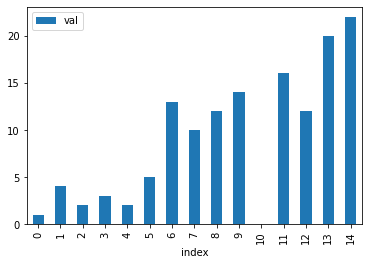

In [253]:
import pandas as pd
data = {'val':[1,4,2,3,2,5,13,10,12,14,np.NaN,16,12,20,22]}
df = pd.DataFrame(data).reset_index()
#df['val'].plot.bar(rot=0, subplots=True)
df.plot(kind='bar',x='index',y='val')

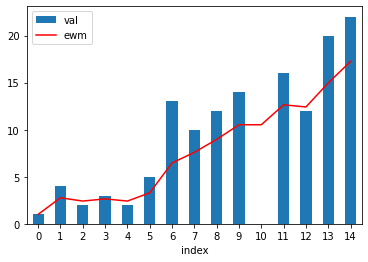

In [254]:
df2 = df.assign(ewm=df['val'].ewm(alpha=0.3).mean()) # val 열에 ewm 메서드 적용 후 df에 추가
ax = df.plot(kind='bar',x='index',y='val')
ax2 = df2.plot(kind='line',x='index',y='ewm',color='red',ax=ax) # ax2에 df2의 line chart 생성후 ax에 추가
plt.show()

In [255]:
# myEWMA는 지수이동평균값을 df.ewm(span=3).mean()과 같이 계산해주도록 정의한 메소드
df = pd.DataFrame({'week':pd.date_range(start='2020-08',periods=8,freq="W"),
'sales':[39,44,40,45,38,43,39,np.nan],
'3EMA':[0]*8})

#지수 이동 평균 계산할 함수 , data 지수 이동 평균 계산 데이터 , span 지수 이동 평균의 거리 (강의 자료에서 3주마다 지수 이동 평균이므로 3)

def myEWMA(data,span):
    ewma=[0]*len(data) #지수 이동평균을 계산해서 저장할 리스트
    molecule = 0 #지수 이동 평균의 분자
    denominator = 0 #지수 이동 평균의 분모
    alpha = 2.0 / (1.0 + span)
    for i in range(len(data)):
        molecule = (data[i] + (1.0-alpha)*molecule) # 분자 계산 data+(1-alpha)앞의 데이터
        denominator+=(1-alpha)**i # 분모계산 (1-alpha)의 i승
        print(f"index : {i}")
        print(f"molecule : {molecule}")
        print(f"denominator : {denominator}")
        ewma[i] = molecule/denominator
        print(f"ewma : {ewma[i]}")
        print("="*100)
    return ewma

In [256]:
ewma = df['sales'].ewm(span=3).mean()
ewma

0    39.000000
1    42.333333
2    41.000000
3    43.133333
4    40.483871
5    41.761905
6    40.370079
7    40.370079
Name: sales, dtype: float64

In [257]:
myEWMA(df['sales'].iloc[0:2],3)

index : 0
molecule : 39.0
denominator : 1.0
ewma : 39.0
index : 1
molecule : 63.5
denominator : 1.5
ewma : 42.333333333333336


[39.0, 42.333333333333336]

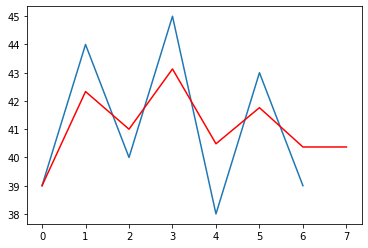

In [258]:
df['sales'].plot()
df['ewm']=ewma
df['ewm'].plot(color='r')
plt.show()

### 자기 상관함수(ACF)
* 비정상성 데이터 정상성 가지게 만들려면 차분 이용!
* 자기상관 (다른 시점의 관측값 간 상호 연관성을 나타내므로 시차를 적용한 시계열 데이터 간의 상관관계)이 작을 수록 정상성 데이터
* AC0 동일한 시계열 데이터 간 상관관계이므로 항상 1
* 시차가 커질수록 자기상관함수(ACF)는 점차 0에 가까워짐 (정상 데이터)
    * 정상시계열의 자기상관함수는 상대적으로 빨리 0으로 접근함
    * 비정산 시계열의 ACF는 천천히 감소하며 종종 큰 양의 값을 가짐
* 정상성 보이는 데이터는 계절성,추세,순환을 가지고 있으면 안됨 ! 전체적으로 고르게 분포된 !! 
* 차분(differencing) : 시계열의 수준에서 나타내는 변화를 제거하여 시계열의 평균 변화를 일정하게 만드는 것을 도움

#### 차분

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
## getting drug sales dataset
file_path= 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(file_path, parse_dates=['date'], index_col='date')
# df.head(12)

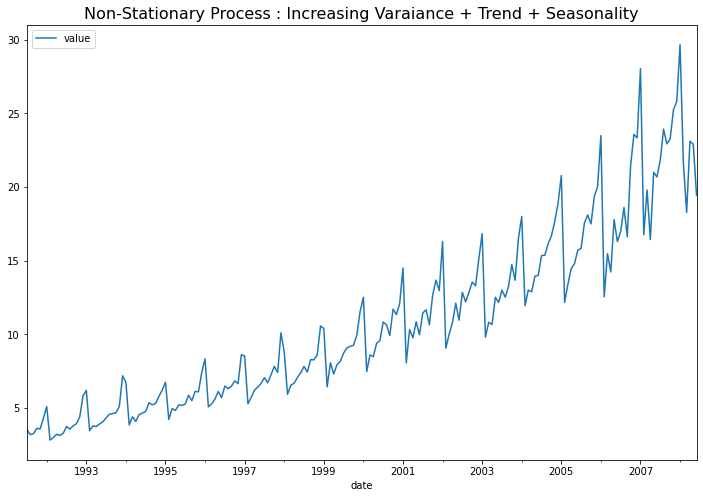

In [260]:
df.plot(figsize = [12,8])
plt.title('Non-Stationary Process : Increasing Varaiance + Trend + Seasonality',fontsize=16)
plt.show()
# 분산이 시간 흐름에 따라 증가(분산 고정 아님), 추세가 있으며, 1년 주기의 계절성이 있음 -> 비정상 확률과정

C:\Program Files\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


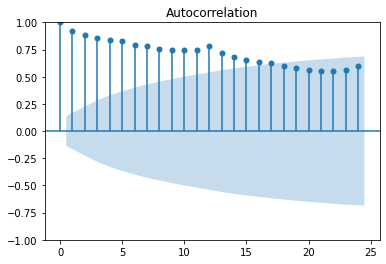

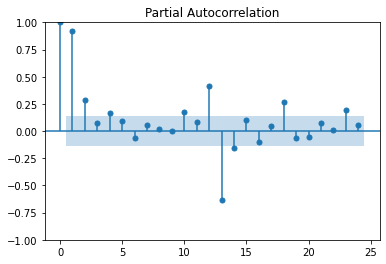

In [261]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plot_acf(df)
fig = plot_pacf(df)
plt.show()

In [262]:
# Variance Stabilizing Transformation (VST) by Taking Logarithm
df['vst(log)'] = np.log(df.value)
# df_vst.head()
# df.drop('vst',axis=1,inplace=True)
df

,value,vst(log)
date,,
1991-07-01,3.526591,1.260332
1991-08-01,3.180891,1.157161
1991-09-01,3.252221,1.179338
1991-10-01,3.611003,1.283986
1991-11-01,3.565869,1.271408
...,...,...
2008-02-01,21.654285,3.075203
2008-03-01,18.264945,2.904984
2008-04-01,23.107677,3.140165


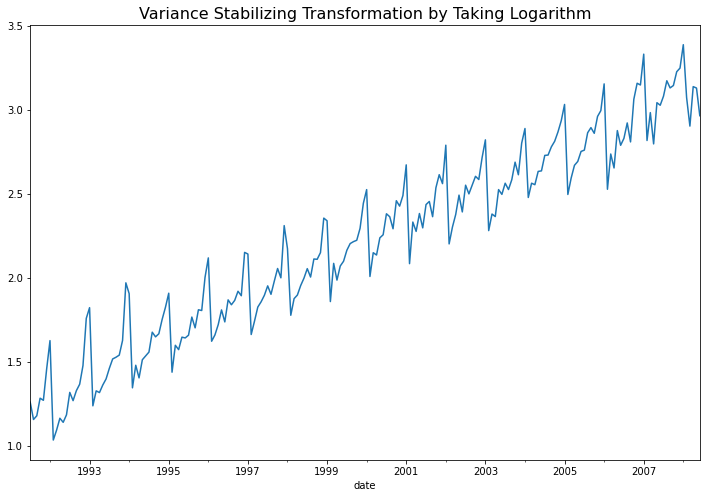

In [263]:
df['vst(log)'].plot(figsize=(12,8))
plt.title('Variance Stabilizing Transformation by Taking Logarithm', fontsize=16)
plt.show() # 그래프 모양은 같은데 y값이 달라짐

In [264]:
# De-trend by Differencing
df_vst_diff1 = df_vst.diff(1).dropna() #첫번째 값이 nan이라 지워준거!
df_vst_diff1

date
1991-08-01   -0.103170
1991-09-01    0.022177
1991-10-01    0.104647
1991-11-01   -0.012578
1991-12-01    0.188688
                ...   
2008-02-01   -0.314777
2008-03-01   -0.170220
2008-04-01    0.235181
2008-05-01   -0.008482
2008-06-01   -0.164775
Name: value, Length: 203, dtype: float64

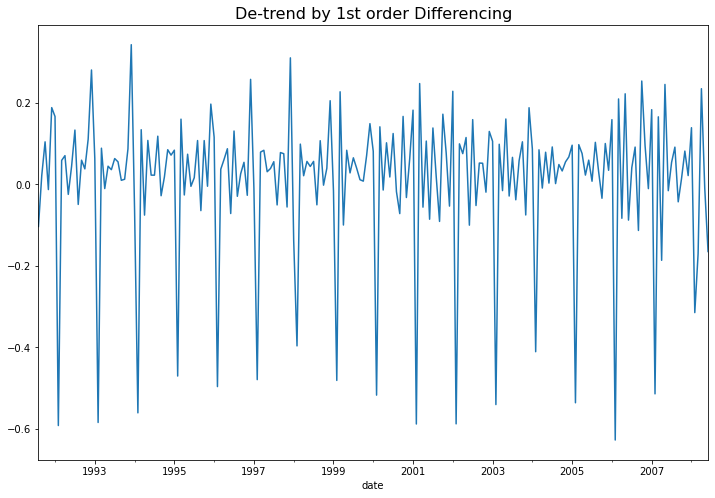

In [265]:
plt.figure(figsize=(12,8))
df_vst_diff1.plot()
plt.title('De-trend by 1st order Differencing', fontsize=16)
plt.show()

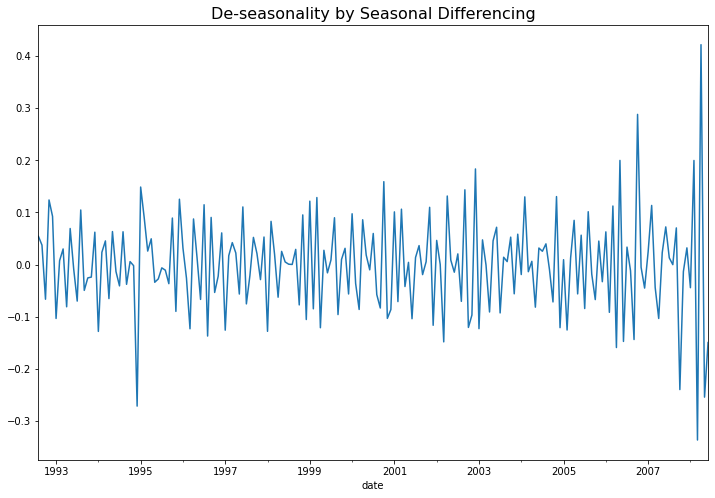

In [266]:
# Stationary Process : De-seasonality by Seasonal Differencing
df_vst_diff1_diff12 = df_vst_diff1.diff(12).dropna()

plt.figure(figsize=(12,8))
df_vst_diff1_diff12.plot()
plt.title("De-seasonality by Seasonal Differencing",fontsize=16)
plt.show()

C:\Program Files\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


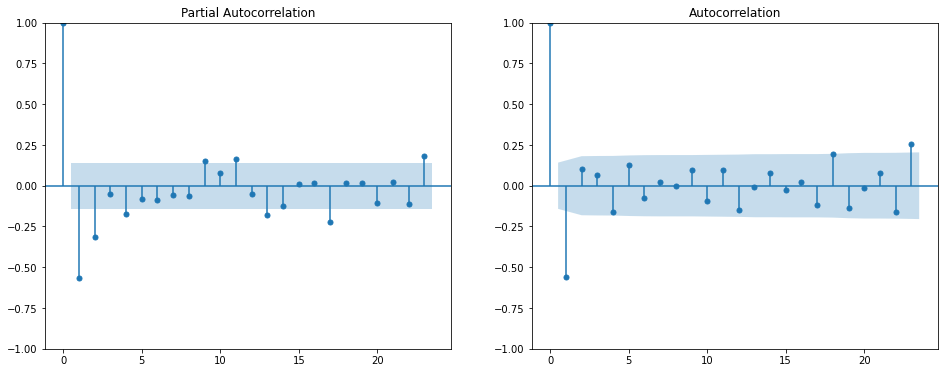

In [272]:
# # plt.subplot(1,2,1)
# plot_acf(df_vst_diff1_diff12)
# # plt.subplot(1,2,2)
# plot_pacf(df_vst_diff1_diff12)
# plt.show()

fig, axs=plt.subplots(figsize=(16,6),ncols=2,nrows=1, facecolor='w')

fig = plot_pacf(df_vst_diff1_diff12,ax=axs[0])
fig = plot_acf(df_vst_diff1_diff12,ax=axs[1])

### AR 자기회기 모형

#### statsmodels.tsa.arima_process.ArmaProcess
> class statsmodels.tsa.arima_process.ArmaProcess(ar=None, ma=None, nobs=100)
* ar, ma array

In [206]:
from statsmodels.tsa.arima_process import ArmaProcess

#ArmaProcess로 모형 생성하고 nobs 만큼 샘플 생성
def gen_arma_samples(ar,ma,nobs):
     arma_model = ArmaProcess(ar=ar, ma=ma) # 모형 정의
     arma_samples = arma_model.generate_sample(nobs) #샘플 생성
     return arma_samples

#drift가 있는 모형은 ArmaProcess에서 처리가 안 되어서 수동으로 정의해줘야 함
def gen_random_walk_w_drift(nobs,drift):
    init = np.random.normal(size=1, loc=0)
    e = np.random.normal(size=nobs, scale=1)
    y = np.zeros(nobs)
    y[0] = init
    for t in (1,nobs):
        y[t] = drift + 1*y[t-1] + e[t]
        return y

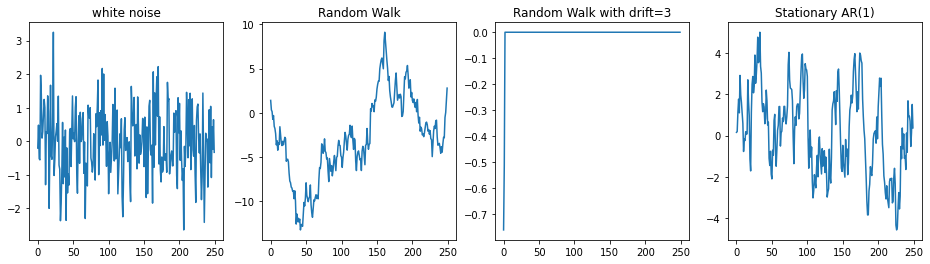

In [210]:
np.random.seed(12345)

white_noise = gen_arma_samples(ar=[1], ma=[1], nobs=250)
# y_t = epsilon_t
random_walk = gen_arma_samples(ar=[1,-1], ma = [1], nobs=250)
#1(1-L)y_t = epsilon_t
random_walk_w_drift = gen_random_walk_w_drift(250,2)
#y_t=2+y_{t-1} + epsilon_t
stationary_ar_1 = gen_arma_samples(ar = [1,-0.9],ma = [1], nobs=250)
# (1-0.9L)y_t=epsilon_t

fig,ax=plt.subplots(1,4)
ax[0].plot(white_noise)
ax[0].set_title("white noise")
ax[1].plot(random_walk)
ax[1].set_title("Random Walk")
ax[2].plot(random_walk_w_drift)
ax[2].set_title("Random Walk with drift=3")
ax[3].plot(stationary_ar_1)
ax[3].set_title("Stationary AR(1)")

fig.set_size_inches(16,4)

#### ARIMA 모형 구축

In [235]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_apple['Close'], order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3093
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4880.184
Date:                Mon, 18 Apr 2022   AIC                           9764.367
Time:                        17:21:28   BIC                           9776.440
Sample:                             0   HQIC                          9768.703
                               - 3093                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0400      0.008     -5.248      0.000      -0.055      -0.025
sigma2         1.3754      0.012    115.958      0.000       1.352       1.399
Ljung-Box (L1) (Q):                   0.01   Jarque-

C:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


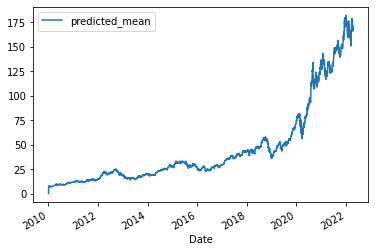

In [239]:
model_fit.predict().plot()
plt.legend()

In [13]:
import pandas as pd
import numpy as np
df3 = pd.DataFrame({"B": [0, 1, 2, np.nan, 4,2,3,1,5]})
df3

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0
5,2.0
6,3.0
7,1.0
8,5.0


In [18]:
df3['C']=df3['B'].rolling(3).mean()
df3['E']=df3['B'].expanding(4).mean()
df3

,B,A,C,D,E
0,0.0,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,0.500000,NaN
2,2.0,1.000000,1.0,1.000000,NaN
3,NaN,1.000000,NaN,1.000000,NaN
4,4.0,1.750000,NaN,1.750000,1.750000
5,2.0,1.800000,NaN,1.800000,1.800000
6,3.0,2.000000,3.0,2.000000,2.000000
7,1.0,1.857143,2.0,1.857143,1.857143
8,5.0,2.250000,3.0,2.250000,2.250000
